In [2]:
# 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# 📥 데이터 다운로드 (Download Dataset from GitHub)
# 이 노트북은 깃허브에서 wine.csv 파일을 직접 다운로드하여 사용합니다.
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/wine.csv

--2025-06-24 03:53:55--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12300 (12K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>]  12.01K  --.-KB/s    in 0.001s  

2025-06-24 03:53:55 (22.8 MB/s) - ‘wine.csv’ saved [12300/12300]



# Multiple Linear Regression

In [4]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['mlxtend'])


mlxtend is already installed.


In [5]:
## 필요 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot


# scikit-learn vs statsmodel

1. scikit-learn의 LinearRegression
- 주로 예측 모델링에 사용
- 머신러닝 워크플로우(데이터 전처리, 모델 선택, 하이퍼파라미터 튜닝 등)와 통합하기 좋음
- 간결하고 사용하기 쉬운 API를 제공
- 통계적 검정이나 모델 요약을 제공하지 않음...


2. statsmodels의 OLS
- 주로 통계 분석 및 모델 해석에 사용
- 상세한 모델 요약과 통계적 검정(예: p-value, t-value)을 제공
- 회귀 진단 플롯과 같은 시각화 기능을 포함
- pandas의 DataFrame를 선호

3. 둘다 사용..
- 두 라이브러리를 함께 사용하는 것도 가능하며, 각 라이브러리의 장점을 활용할 수 있음
- scikit-learn을 사용하여 모델을 학습하고 평가한 후, statsmodels를 사용하여 모델의 통계적 검정을 수행할 수 있음
- https://medium.com/@hsrinivasan2/linear-regression-in-scikit-learn-vs-statsmodels-568b60792991
- https://www.reddit.com/r/datascience/comments/fotjm9/statsmodels_vs_sklearn_for_the_linear_models/


# 1. 다중회귀분석

In [6]:
rd = pd.read_csv('wine.csv')
rd

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,Wine B
1,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,Wine C
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,Wine A
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,Wine B
4,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,Wine C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,Wine A
172,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428,Wine B
173,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600,Wine C
174,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650,Wine C


- Alcohol: 알코올 함량 (%)
- Malic acid: 사과산 함량
- Ash: 무기질 성분 총량
- Alcalinity of ash: 재의 알칼리성
- Magnesium: 마그네슘 함량
- Total phenols: 총 페놀 함량
- Flavanoids: 플라보노이드 함량
- Nonflavanoid phenols: 비플라보노이드 페놀 함량
- Proanthocyanins: 프로안토시아닌 함량
- Color intensity: 색 강도
- Hue: 색조
- OD280/OD315 of diluted wines: 폴리페놀 함량 비율
- Proline: 프롤린 함량

In [7]:
rd = rd.drop(['Class'], axis = 1)
rd

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
2,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680
3,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
4,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
172,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428
173,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
174,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650


## 종속 변수 및 독립변수 설정

In [8]:
## 종속 변수와 독립 변수 설정
X = rd.drop(columns=['Alcohol']) # 독립변수
y = rd['Alcohol'] # 종속변수

## 회귀모델 적합(학습) 데이터 및 테스트 데이터 분할
X_train, X_new, y_train, y_new = train_test_split(X, y,
                                                  test_size = 0.1,# new 가 붙은 데이터의 비중이
                                                  random_state = 1234)


## VIF

### VIF 확인

In [9]:
### VIF 계산 함수
def calculate_vif(X):
    X = add_constant(X) ##
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

## VIF 계산
vif_df0 = calculate_vif(X_train)
vif_df0

,Variable,VIF
0,const,215.238429
1,Malic acid,1.491380
2,Ash,2.197552
3,Alcalinity of ash,2.096886
4,Magnesium,1.467636
5,Total phenols,4.003213
6,Flavanoids,6.449366
7,Nonflavanoid phenols,1.851041
8,Proanthocyanins,1.881527
9,Color intensity,2.425776


### VIF 10 이상 제거

In [10]:
def remove_high_vif(X, threshold = 10):
    while True:
        vif = calculate_vif(X)
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            max_feature = vif.loc[vif['VIF'] == max_vif, 'Variable'].values[0]
            if max_feature != 'const':
                print(f"Removing {max_feature} with VIF {max_vif}")
                X = X.drop(max_feature, axis=1)
            else:
                break
        else:
            break
    return X

## VIF 계산 및 높은 VIF 값을 가진 변수 제거
X_reduced = remove_high_vif(X_train, threshold = 10)
print("Final VIF values:")
print(calculate_vif(X_reduced))

Final VIF values:
                        Variable         VIF
0                          const  215.238429
1                     Malic acid    1.491380
2                            Ash    2.197552
3              Alcalinity of ash    2.096886
4                      Magnesium    1.467636
5                  Total phenols    4.003213
6                     Flavanoids    6.449366
7           Nonflavanoid phenols    1.851041
8                Proanthocyanins    1.881527
9                Color intensity    2.425776
10                           Hue    2.432756
11  OD280/OD315 of diluted wines    3.776192
12                       Proline    2.242885


## 변수 선택법

### 기본 모델

In [11]:
model_raw = LinearRegression() # 객체 선언
model_raw.fit(X = X_train, # 독립변수
              y = y_train) # 종속 변수

print('R2:', model_raw.score(X_train, y_train)) ## R2값

## 적합 모형 수정 R^2 값 확인
def adjusted_r2(model, X, y):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

adj_r2_raw = adjusted_r2(model_raw, X_train, y_train) ## adj R2 값
print('adj R2:', adj_r2_raw)

R2: 0.5809173349673529
adj R2: 0.5462346316543062


### 전진선택법

In [12]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## 전진 선택법 적용
sfs = SFS(LinearRegression(),
          k_features = 'best',
          forward = True, # 방향
          floating = False, # True 이면 각 단계에서 변수를 추가하거나 제거할 때, 이전에 선택/제거된 변수들도 재고려한다는 의미
          scoring =  'r2', # 중간 과정 계산 기준
          cv = 0, # cv > 1 이면, 여러번 반복해서 더 정확하게 추정 가능 보통 5, 10 사용
          verbose = 2) # 1: 요약 출력, 2: 과정 전체 출력, 0: 출력x

sfs = sfs.fit(X_train, y_train)
selected_features_fs = list(sfs.k_feature_names_)
selected_features_fs ## 전체모델하고 동일


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2025-06-24 03:53:59] Features: 1/12 -- score: 0.3862333103572353[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2025-06-24 03:53:59] Features: 2/12 -- score: 0.527854931220622[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2025-06-24 03:53:59] Features: 3/12 -- score: 0.5422664293389861[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2025-06-24 03:53:59] Features: 4/12 -- score: 0.5600536174439446[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2025-06-24 03:53:59] Features: 5/12 -- score: 0.56966480013907[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2025-06-24 03:53:59] Features: 6/12 -- score: 0.5750519620410144[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2025-06-24 03:53:59] Features: 7/12 -- score: 0.5780127727881217[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed

['Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [13]:
## 전진 선택법 적용한 결과 확인 및 수정 R^2값 확인
model_fs = LinearRegression()
model_fs.fit(X_train[selected_features_fs], y_train)

adj_r2_fs = adjusted_r2(model_fs, X_train[selected_features_fs], y_train)
print('adj R2:', adj_r2_fs)

adj R2: 0.5462346316543062


In [14]:
## statsmodels를 사용하여 회귀 분석 결과 요약
X_const = sm.add_constant(X_train[selected_features_fs])  # 상수항 추가!!
model_fs2 = sm.OLS(y_train, X_const).fit() # model_fs.fit(X_train[selected_features_fs], y_train) 와 동일
results = model_fs2.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     16.75
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           5.88e-22
Time:                        03:54:00   Log-Likelihood:                -119.31
No. Observations:                 158   AIC:                             264.6
Df Residuals:                     145   BIC:                             304.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           10.8210      0.627     17.249      0.000       9.581      12.061
Malic acid                       0.1382      0.047      2.911      0.004       0.044       0.232
Ash                              0.1193      0.225      0.530      0.597      -0.326       0.565
Alcalinity of ash               -0.0294      0.019     -1.556      0.122      -0.067       0.008
Magnesium                        0.0001      0.004      0.041      0.967      -0.007       0.007
Total phenols                    0.1133      0.138      0.820      0.413      -0.160       0.386
Flavanoids                      -0.0285      0.110     -0.259      0.796      -0.246       0.189
Nonflavanoid phenols            -0.2684      0.461     -0.583      0.561      -1.179       0.642
Proanthocyanins                 -0.1518      0.106     -1.431      0.155      -0.362       0.058
Color intensity                  0.1665      0.029      5.811      0.000       0.110       0.223
Hue                              0.2079      0.293      0.709      0.479      -0.372       0.787
OD280/OD315 of diluted wines     0.1807      0.117      1.541      0.125      -0.051       0.412
Proline                          0.0010      0.000      4.700      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.472   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.194
Skew:                          -0.038   Prob(JB):                        0.908
Kurtosis:                       3.154   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 회귀 분석 결과 요약
  - 가정확인:
    - Omnibus: 0.300, Prob(Omnibus): 0.861  
      잔차가 정규분포를 따르는지 테스트하는 통계량. 높은 p-value는 정규성 의미
    - Durbin-Watson: 2.063  
      잔차의 자기 상관을 테스트하는 통계량. 2에 가까운 값은 자기 상관이 없음을 의미.
    - Jarque-Bera (JB): 0.089, Prob(JB): 0.957  
      잔차의 정규성을 테스트하는 통계량. 높은 p-value는 정규성을 의미
    - Skew: 0.015  
      잔차의 왜도. 0에 가까운 값은 대칭적임을 나타냄
    - Kurtosis: 3.106  
      잔차의 첨도. 3에 가까운 값은 정규분포에 가까움을 의미

  - 모델 적합도:
    - F-statistic:	16.75
    - Prob (F-statistic):	5.88e-22, 모델 전체가 통계적으로 유의미함.
    - R-squared: 0.581
    - 독립 변수들이 종속 변수의 변동성을 약 59.1% 설명함.
    - Adjusted R-squared: 0.546
    - 유의미한 변수:  
        Malic acid: 0.1382, p-value = 0.004 (양의 영향)  
        Color intensity: 0.1665, p-value < 0.001 (양의 영향)  
        Proline: 0.0010, p-value < 0.001 (양의 영향)  


#### 모델이 전체적으로 유의하지만 개별 독립 변수들이 유의하지 않은 경우가 발생하는 경우..
- 다중공선성 문제
- 표본 크기
- 데이터의 변동성 등 여러 가지가 원인이 될 수 있음

### 후진선택법

In [15]:
## 후진 선택법 적용
sfs = SFS(LinearRegression(),
          k_features = 'best',
          forward = False, #
          floating = False,
          scoring =  adjusted_r2,
          cv = 0,
          verbose = 2)

sfs = sfs.fit(X_train, y_train)
selected_features_bs = list(sfs.k_feature_names_)
selected_features_bs

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 11/1 -- score: 0.5493374102500296[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 10/1 -- score: 0.5521882421208177[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 9/1 -- score: 0.5543803645041165[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 8/1 -- score: 0.5566254417583647[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 7/1 -- score: 0.5583200355182341[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 6/1 -- score: 0.5581666095393328[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 5/1 -- score: 0.5555090369857498[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 

['Malic acid',
 'Alcalinity of ash',
 'Total phenols',
 'Proanthocyanins',
 'Color intensity',
 'OD280/OD315 of diluted wines',
 'Proline']

In [16]:
## 후진 선택법 적용한 결과 확인 및 수정 R^2값 확인
model_bs = LinearRegression()
model_bs.fit(X_train[selected_features_bs], y_train)

adj_r2_bs = adjusted_r2(model_bs, X_train[selected_features_bs], y_train)
print('adj R2:', adj_r2_bs)

adj R2: 0.5583200355182341


In [17]:
## statsmodels를 사용하여 회귀 분석 결과 요약
X_const = sm.add_constant(X_train[selected_features_bs])  # 상수항 추가
model_bs2 = sm.OLS(y_train, X_const).fit()
results = model_bs2.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     29.35
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           3.19e-25
Time:                        03:54:00   Log-Likelihood:                -119.86
No. Observations:                 158   AIC:                             255.7
Df Residuals:                     150   BIC:                             280.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           11.0683      0.413     26.821      0.000      10.253      11.884
Malic acid                       0.1266      0.043      2.960      0.004       0.042       0.211
Alcalinity of ash               -0.0252      0.015     -1.728      0.086      -0.054       0.004
Total phenols                    0.1142      0.111      1.026      0.307      -0.106       0.334
Proanthocyanins                 -0.1571      0.096     -1.635      0.104      -0.347       0.033
Color intensity                  0.1593      0.025      6.445      0.000       0.110       0.208
OD280/OD315 of diluted wines     0.1915      0.103      1.860      0.065      -0.012       0.395
Proline                          0.0011      0.000      5.728      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.818   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.454
Skew:                           0.008   Prob(JB):                        0.797
Kurtosis:                       3.262   Cond. No.                     7.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 모델 적합도:
    - R-squared: 0.558
    - 독립 변수들이 종속 변수의 변동성을 약 55.8% 설명함.
    - Adjusted R-squared: 0.558
- 유의미한 변수:
    - Malic acid: 0.1266, p-value = 0.004 (양의 영향)
    - Color intensity: 0.1593, p-value < 0.001 (양의 영향)
    - Proline: 0.0011, p-value < 0.001 (양의 영향)

### 단계적 선택법

In [18]:
## 단계적 선택법 적용
sfs = SFS(LinearRegression(),
          k_features = 'best',
          forward = False, # 시작방향이 Full model(backward)
          floating = True, ## True 이면 각 단계에서 변수를 추가하거나 제거할 때, 이전에 선택/제거된 변수들도 재고려한다는 의미
          scoring =  adjusted_r2,
          cv = 0,
          verbose = 2)

sfs = sfs.fit(X_train, y_train)
selected_features_step = list(sfs.k_feature_names_)
selected_features_step

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 11/1 -- score: 0.5493374102500296[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 10/1 -- score: 0.5521882421208177[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 9/1 -- score: 0.5543803645041165[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 8/1 -- score: 0.5566254417583647[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2025-06-24 03:54:00] Features: 7/1 -- score: 0.5583200355182341[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 |

['Malic acid',
 'Alcalinity of ash',
 'Total phenols',
 'Proanthocyanins',
 'Color intensity',
 'OD280/OD315 of diluted wines',
 'Proline']

In [19]:
## 단계적 선택법 적용한 결과 확인 및 수정 R^2값 확인
model_step = LinearRegression()
model_step.fit(X_train[selected_features_step], y_train)

adj_r2_step = adjusted_r2(model_step, X_train[selected_features_step], y_train)
print('adj R2:', adj_r2_step)

adj R2: 0.5583200355182341


In [20]:
## statsmodels를 사용하여 회귀 분석 결과 요약
X_const = sm.add_constant(X_train[selected_features_step])  # 상수항 추가
model_step2 = sm.OLS(y_train, X_const).fit()
results = model_step2.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     29.35
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           3.19e-25
Time:                        03:54:00   Log-Likelihood:                -119.86
No. Observations:                 158   AIC:                             255.7
Df Residuals:                     150   BIC:                             280.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           11.0683      0.413     26.821      0.000      10.253      11.884
Malic acid                       0.1266      0.043      2.960      0.004       0.042       0.211
Alcalinity of ash               -0.0252      0.015     -1.728      0.086      -0.054       0.004
Total phenols                    0.1142      0.111      1.026      0.307      -0.106       0.334
Proanthocyanins                 -0.1571      0.096     -1.635      0.104      -0.347       0.033
Color intensity                  0.1593      0.025      6.445      0.000       0.110       0.208
OD280/OD315 of diluted wines     0.1915      0.103      1.860      0.065      -0.012       0.395
Proline                          0.0011      0.000      5.728      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.818   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.454
Skew:                           0.008   Prob(JB):                        0.797
Kurtosis:                       3.262   Cond. No.                     7.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 모델 적합도:

  - R-squared: 0.578
  - 독립 변수들이 종속 변수(Alcohol)의 변동성을 약 57.8% 설명함.
  - Adjusted R-squared: 0.558
  - 독립 변수의 수를 고려한 후에도 모델이 약 55.8%의 변동성을 설명함.
- 모델 통계량:

  - F-statistic: 29.35
  - Prob (F-statistic): 3.19e-25
  - 모델 전체가 통계적으로 유의미함.
  
- 유의미한 변수:

  - const: 11.0683, p-value < 0.001
  - Malic acid: 0.1266, p-value = 0.004 (유의미한 양의 영향)
  - Color intensity: 0.1593, p-value < 0.001 (유의미한 양의 영향)
  - Proline: 0.0011, p-value < 0.001 (유의미한 양의 영향)

### 비교

In [21]:
# 데이터프레임 생성
output = {
    'Method': ['Forward Selection', 'Backward Elimination', 'Stepwise Selection'],
    'Adjusted R2': [adj_r2_fs, adj_r2_bs, adj_r2_step],
    'Selected Features': [selected_features_fs, selected_features_bs, selected_features_step]
}
pd.DataFrame(output)

,Method,Adjusted R2,Selected Features
0,Forward Selection,0.546235,"[Malic acid, Ash, Alcalinity of ash, Magnesium..."
1,Backward Elimination,0.558320,"[Malic acid, Alcalinity of ash, Total phenols,..."
2,Stepwise Selection,0.558320,"[Malic acid, Alcalinity of ash, Total phenols,..."


In [22]:
## MSE 계산

y_raw = model_raw.predict(X_new)
y_fs = model_fs.predict(X_new[selected_features_fs])
y_bs = model_bs.predict(X_new[selected_features_bs])
y_step = model_step.predict(X_new[selected_features_step])


mse_raw = mean_squared_error(y_new, y_raw)
mse_fs = mean_squared_error(y_new, y_fs)
mse_bs = mean_squared_error(y_new, y_bs)
mse_step = mean_squared_error(y_new, y_step)



In [23]:
# 데이터프레임 생성
output = {
    'Method': ['Raw', 'Forward Selection', 'Backward Elimination', 'Stepwise Selection'],
    'Adjusted R2': [adj_r2_raw, adj_r2_fs, adj_r2_bs, adj_r2_step],
    'MSE': [mse_raw, mse_fs, mse_bs, mse_step],
    'Selected Features': [X_train.columns.tolist(), selected_features_fs, selected_features_bs, selected_features_step]
}
pd.DataFrame(output)

,Method,Adjusted R2,MSE,Selected Features
0,Raw,0.546235,0.290338,"[Malic acid, Ash, Alcalinity of ash, Magnesium..."
1,Forward Selection,0.546235,0.290338,"[Malic acid, Ash, Alcalinity of ash, Magnesium..."
2,Backward Elimination,0.558320,0.289529,"[Malic acid, Alcalinity of ash, Total phenols,..."
3,Stepwise Selection,0.558320,0.289529,"[Malic acid, Alcalinity of ash, Total phenols,..."


## 변수 중요도 계산

In [24]:
## Permutation Importance 계산
# 변수의 중요도를 평가하는 방법 중 하나로
# 각 변수를 무작위로 섞어서 모델의 성능 변화량을 측정
# 변수를 섞어서 모델의 성능이 크게 떨어지면 그 변수는 중요한 변수임

## 데이터 스케일링: 데이터 단위 크기를 맞춰주기 위한 방법 (데이터 표준화, z-score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train[selected_features_step])
X_scaled_df = pd.DataFrame(X_scaled,
                           columns = selected_features_step)  # 스케일링 후 데이터프레임으로 변환 및 컬럼 이름 부여


result = permutation_importance(model_step,
                                X_scaled_df,
                                y_train,
                                n_repeats = 10,
                                random_state = 123)

## 변수 중요도 출력
feature_importance = pd.DataFrame({'Feature': selected_features_step,
                                   'Importance': result.importances_mean})
feature_importance = feature_importance.sort_values(by = 'Importance', # 선택 컬럼
                                                    ascending = False) # 내림차순
print(feature_importance)

                        Feature  Importance
4               Color intensity    0.240864
5  OD280/OD315 of diluted wines    0.094347
2                 Total phenols    0.079611
0                    Malic acid    0.058372
3               Proanthocyanins    0.029950
1             Alcalinity of ash    0.013712
6                       Proline    0.001272


## 가정 확인


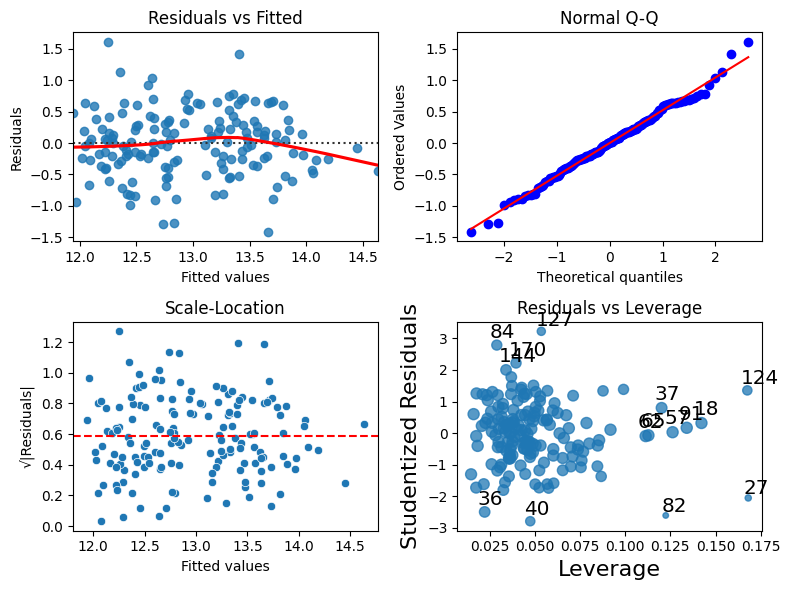

In [25]:
## 다중 플롯을 그릴 수 있는 함수
# from scipy.stats import probplot

## 통계 모듈을 이용한 R^2 계산 (statsmodels)
X_with_const = sm.add_constant(X_train[selected_features_step]) ## 독립 변수에 상수 추가
model_sm = sm.OLS(y_train, X_with_const).fit() ## 모델 적합


def plot_regression_diagnostics(model_sm):
    fig, axes = plt.subplots(2, 2, figsize = (8, 6))

    # Residuals vs Fitted
    sns.residplot(x = model_sm.fittedvalues, y = model_sm.resid, lowess = True, line_kws = {'color': 'red'}, ax = axes[0, 0])
    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')

    # Normal Q-Q
    probplot(model_sm.resid, dist = "norm", plot = axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q')

    # Scale-Location
    sns.scatterplot(x = model_sm.fittedvalues, y = np.sqrt(np.abs(model_sm.resid)), ax = axes[1, 0])
    axes[1, 0].axhline(y = np.mean(np.sqrt(np.abs(model_sm.resid))), color = 'r', linestyle = '--')
    axes[1, 0].set_title('Scale-Location')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('√|Residuals|')

    # Residuals vs Leverage
    sm.graphics.influence_plot(model_sm, criterion = "cooks", ax = axes[1, 1], size = 4)
    axes[1, 1].set_title('Residuals vs Leverage')

    plt.tight_layout()
    plt.show()

# 회귀모형의 가정 확인
plot_regression_diagnostics(model_sm)

- Residuals vs Fitted:
  - 잔차가 랜덤하게 분포하는지 확인  
  - 패턴이 없다면 **선형성** 가정 만족
- QQ Plot (Normal Q-Q):
  - 잔차가 정규 분포를 따르는지 확인  
  - 점들이 대각선에 가까우면 **정규성** 가정 만족!
- Scale-Location (Spread-Location):
  - 잔차의 분산이 일정한지 확인
  - 빨간 선이 수평에 가까울수록 **등분산** 가정 만족
- Residuals vs Leverage:
  - 레버리지 점수가 높은 이상치가 있는지 확인
  - 높은 레버리지와 큰 잔차를 가진 점들은 영향력이 큰 관측치임